## What do we consider as a crime?

<i>For the remainder of the context, we will use wikipedia as our main source: (en.wikipedia.org/wiki/Crime)</i>

In ordinary language, a crime is an unlawful act punishable by a state or other authority. From a general standpoint, the term 'crime' does not have any simple or universally accepted definition. A proposed definition for 'crime' is one that is deemed as an act which is harmful to not only to some individual but also to a community, society, or the state. 

So what are we accessing first? Before we find a direct sector of crime to focus on, lets look at the bigger picture. From the ABS (Australian Bureau of Statistics), we are provided with two key crime figures:

1. Number of Offenders, 2008-09 to 2023-24 
2. Offender Rate - Principal offence of acts intended to cause injury, 2008-09 to 2023-24. 

Then this proposes the question: Why are we looking at these categories? 

Firstly, we want to analyse the general picture of crime in Australia between two or more main considerations. Understanding the previous trend of the number of offenders annually changes and the rate of intent to harm is a good analysis to see if crime has increased, or to understand if aggression amongst offenders has changed. If we can find a clear picture with the two categories, we can identify if there is a true motivation for our product. 

## The goal: 

The goal of this notebook and report is to identify the reason why our product needs to be developed. How would this actually prevent the crime rate from increasing and utilise a forecasting model to predict the next 10 years of the Australian offender count and intent to harm rate. 

---

## Task 1: Setup

1. Install the important libraries and import what we need.

In [1]:
#%pip install pandas
#%pip install matplotlib
#%pip install scikit-learn
#%pip install -U statsmodels==0.14.4 scipy==1.14.1

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
number_of_offenders_data = pd.read_excel('Offenders, 2008-09 to 2023-24.xlsx', sheet_name='Sheet1', header=1, index_col=0) #number of offenders data

harmful_offenders_data = pd.read_excel('Offender rate(a), principal offence of acts intended to cause injury.xlsx', sheet_name='Sheet1', header=1, index_col=0) #number of offenders with intent of harm

In [4]:
number_of_offenders_data['Offender number'] = pd.to_numeric(number_of_offenders_data['Offender number'], errors="coerce")

offenders_data = number_of_offenders_data.iloc[:16]

offenders_data.index

Index(['2008–09', '2009–10', '2010–11', '2011–12', '2012–13', '2013–14',
       '2014–15', '2015–16', '2016–17', '2017–18', '2018–19', '2019–20',
       '2020–21', '2021-22', '2022-23', '2023-24'],
      dtype='object')

In [5]:
# Whilst there are easier ways to do this, we create a manual index for the dataset. 

year_list = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

offenders_data.index = year_list


In [6]:
harmful_data = harmful_offenders_data.iloc[:16]

harmful_data.index = year_list

harmful_data

,Offender rate
2008,384.9
2009,379.0
2010,364.9
2011,348.6
2012,352.3
2013,352.0
2014,353.5
2015,365.1
2016,369.4
2017,362.7


---

## Task 2: Exploratory Data Analysis (EDA):

To ensure we can understand the true pattern and history of our two data figures, we must first analyse the previous trend cycles from 2008-2024 for both the Australian offender count & intent to harm rate amongst offenders. 

#### 1. Offender Count (Australia) from 2008-2024:

Text(0.5, 1.0, 'Australian Offender Count Between 2008-2024:')

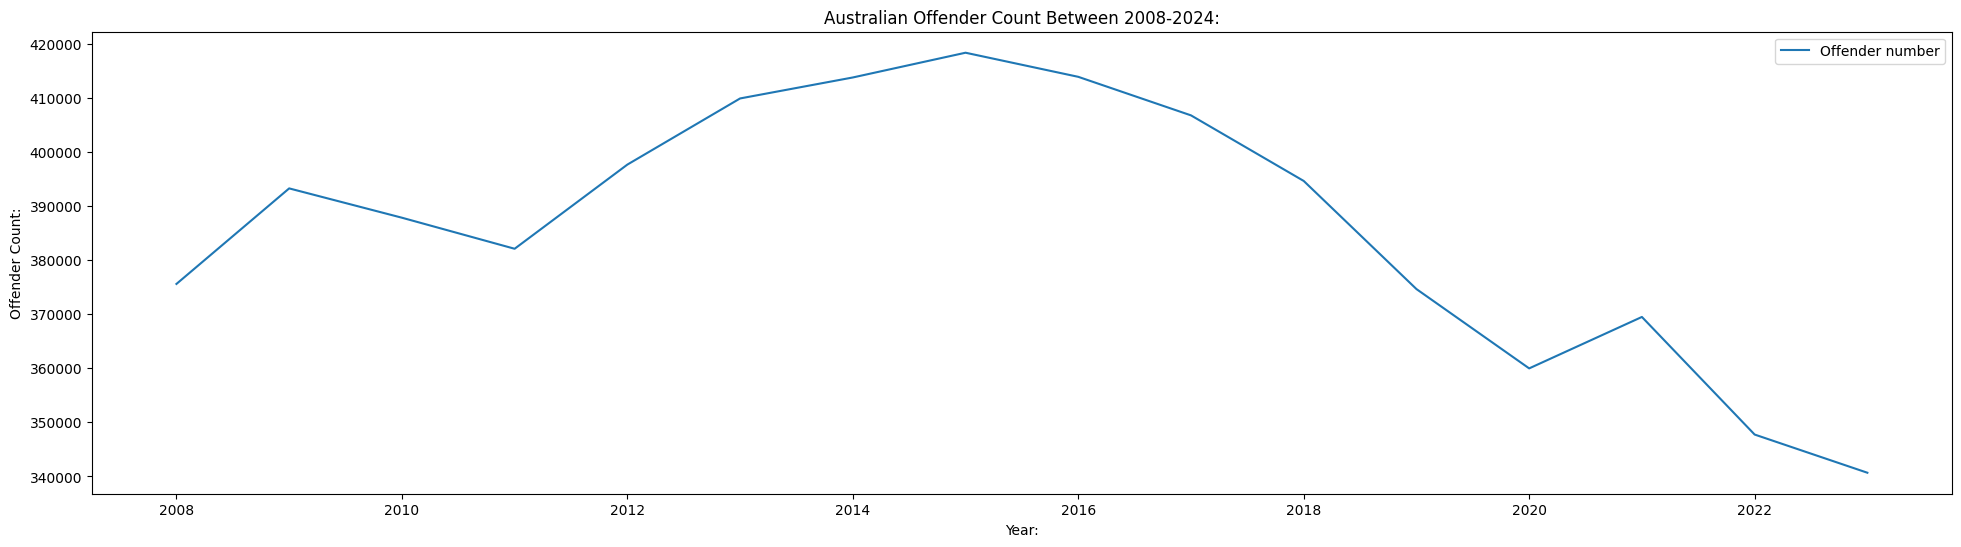

In [7]:
offenders_data.plot(figsize=(24,6))
plt.xlabel("Year:")
plt.ylabel("Offender Count:")
plt.title("Australian Offender Count Between 2008-2024:")


From our initial trend line, we can identify that there has been an overall decrease of total offender count between 2008-2024. However, does this imply that the rate of burglary or house break-in has decreased? To see this, we need to identify the specific data alone. 

Putting that aside, we can identify that from 2008-2015, the offender count had increased substancially, with a gradual decrease from end of 2015 onwards. The true cause of this is unknown, however we could potentially attribute this to increasing Australian laws, increase in security and technology and particularly during the 2020-2023 period, crime would have decreased due to the Covid-19 pandemic. 

Text(0.5, 0, 'Number of Offenders:')

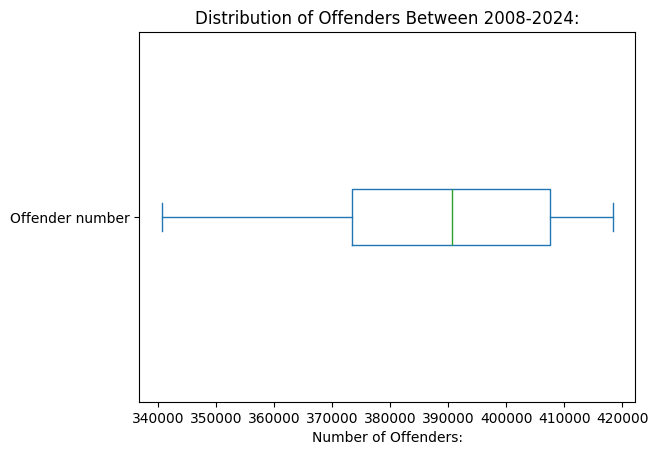

In [8]:
offenders_data.plot.box(vert=False, title="Distribution of Offenders Between 2008-2024:")
plt.xlabel("Number of Offenders:")

In [9]:
number_of_offenders_data.describe()

,Offender number
count,16.000000
mean,386644.437500
std,23914.432894
min,340681.000000
25%,373355.750000
50%,390552.000000
75%,407549.250000
max,418352.000000


To identify how the distribution of offenders has been amongst the previous 16 years, we utilise a box and whisker plot to identify the plots and quantiles. We can identify that from our describe function. we have a mean of 386,644 offenders on average over the 16 years, with a minimum of 340,681 and max of 418,352 offenders. As we can see, there is a spread of roughly 77,671 offenders, quite a substancial spread. 

In general, from our plot we can identify that between 2008 and 2024, offender counts have quite a high range, a median of 390,552 and IQR of 34,194. From these figures we can conclude that the number of offenders remains substancial. Whilst no crime is almost impossible in this day and age, we can see that there is a declining trend in the number of offenders from 2021 onwards.

---

#### 2. Rate of offenders with intent to harm (Australia) from 2008-2024:

As a quick background, the units is slightly different in the way that we track the rate per 100,000 people aged 10 years and over. Indicating a value of 300/400, would mean 300 or 400 people out of 100,000. 

Text(0, 0.5, 'Rate per 100,000 persons aged 10 years and over: ')

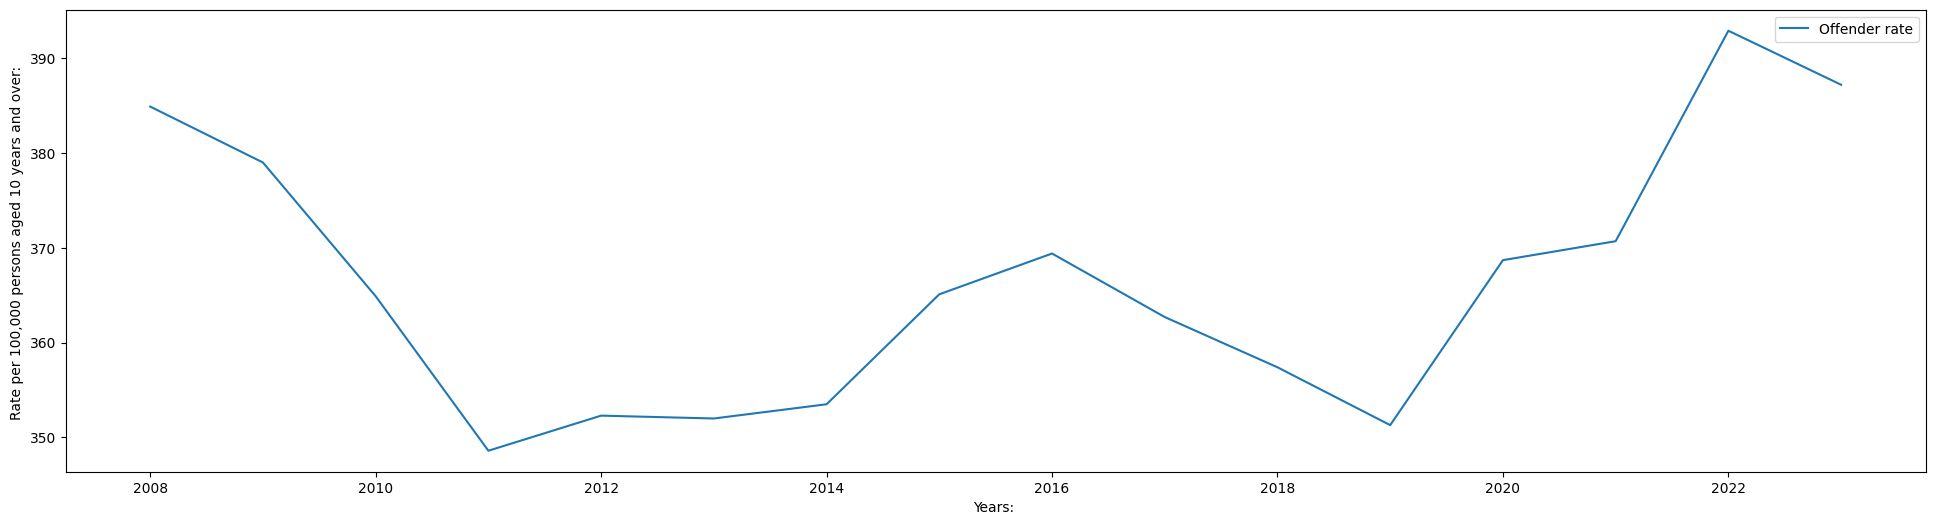

In [10]:
harmful_data.plot(figsize=(24,6))
plt.xlabel("Years: ")
plt.ylabel("Rate per 100,000 persons aged 10 years and over: ")


When analysing our intent to harm rate, we can see that there is no consistent trend with the previous 16 years. From 2008, we can see a sharp decrease by 2011, with a gradual increase which follows up to 2016.

Following this point, we see a small decrease and a large increase overall in the rate of intent to harm. These could be attributed to a multitude of factors, both psychological and economic. What we can say is, the intent to harm has increased to the highest we have seen, indicating that for any further crime, more injuries and intent to harm or kill will increase. 

Text(0.5, 0, 'Rate per 100,000 persons aged 10 years and over: ')

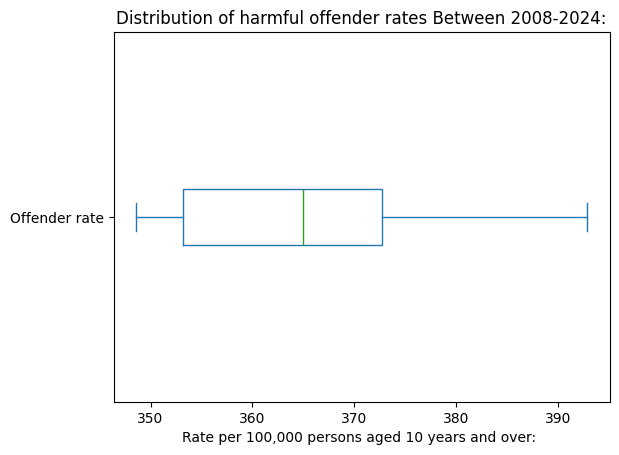

In [11]:
harmful_data.plot.box(vert=False, title="Distribution of harmful offender rates Between 2008-2024:")
plt.xlabel("Rate per 100,000 persons aged 10 years and over: ")

In [12]:
harmful_data.describe()

,Offender rate
count,16.000000
mean,366.287500
std,13.867318
min,348.600000
25%,353.200000
50%,365.000000
75%,372.775000
max,392.900000


From our harmful data, we can identify that the mean rate of offenders with intent to harm is 366.29 per 100,000 individuals. In a numerical sense, this reflects only 0.36629% of offenders have an intent to harm. But with such a small rate, should we even consider said data? 

Whilst this data shows that the current rate to harm is only a mere fraction of all offenders, the overall aim is to reach a net zero. The potential of harm or even death-causing effects must be reduced, even if we can decrease it by only a few %. 

In contrast to our offender count, we have a spread of 44.3, demonstrating more centralised data towards the mean. We can further reinforce this finding through the mean and 50% quantile value of 366.29, 365.00, respectively. Evidently, we have very little spread from the 50% with the mean value. 

Conclusively, we can sufficiently say that our intent to harm rate is controlled with a certain range of values, showing that perhaps repeated offenders are measured in the data. 

---

#### Overall Analysis of Data: 

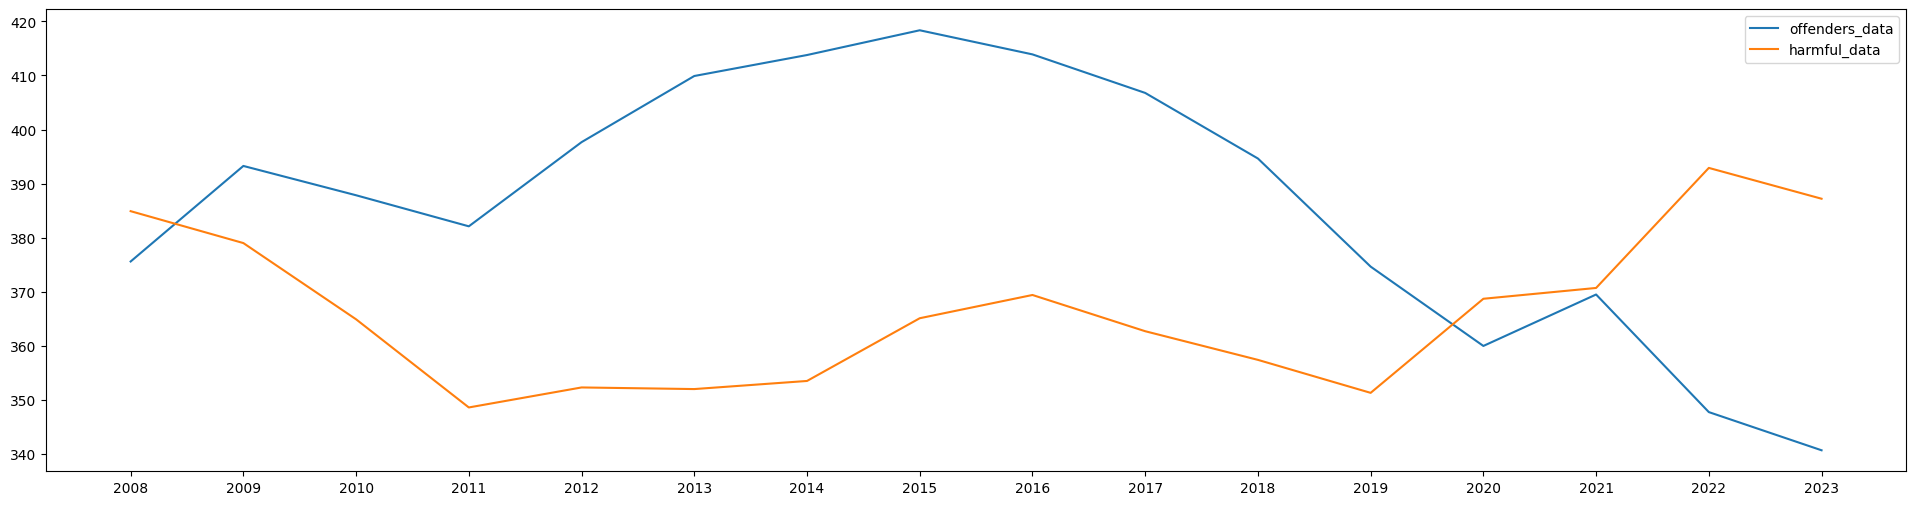

In [13]:
plt.figure(figsize=(24,6))
plt.plot((offenders_data/1000), label='offenders_data')
plt.plot(harmful_data, label='harmful_data')
plt.legend()


Overall, we can identify that between the two graphs, they feature a similar pattern & trend within the first 11 years, with an intersection and inverse pattern correlation past 2019. 

So if offender counts are going down, wouldn't this mean that the general crime rate is decreasing? Not exactly, if we consider the fact that the number of offenders are decreasing (which is good in itself), but the actual aggression and intent to harm for the residual offender rate is increasing, this means that more harm and potential of killing increases. 

---

## Justification of Forecast Model: 



Firstly, to understand which model we would utilise, we must consider our current data and situation. Given our dataset has only 16 yearly observations, our only two main forecasting models would be ARIMA and a machine learning model (however, you will soon understand why we focus on one over the other).

In a general sense, the ARIMA model, aka the AutoRegressive Integrated Moving Average is a powerful statistic method for time series forecasting, used to understand and predict future data points by analysing past values, trends and errors in a sequential manner. 

In contrast, machine learning (ML) forecasting utilises algorithms to analyse historical data, learn complex patterns and trends, and predict future outcomes, going beyond simple projections to model intricate relationships for better accuracy in sales, demand, finance and a multitude of forecasts. 

When we compare both for our current project, we can classify both models into the following: 

1. ARIMA: Good for only few years of data (such as ours), providing sensible and explanable forecasts.

2. ML: Essentially a model which learns by seeing thousands of examples, which in our case we do not have, thus overfitting or guessing will occupy most of our results. 

Therefore, the utilisation of an ARIMA model is more appropriate due to the size of our dataset. ABS offender rates and intent to harm rate data contains only 16 annual observations. With such a reduced sample size, the utilisation of a ML model will result in overfitting and extreme levels of guessing. This ultimately leads our model to more or less guess than actually have a sensible confidence level. In contrast, the utilisation of an ARIMA model can capture temporal dependence and persistence (patterns and trends) and provide actual, sensible forecasts even with such small dataset.

---

## Task 3: Arima Model Prediction (Offender Rate: )

In [14]:
# Performance and Stability Settings
import os 
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"

In [15]:
#%pip install -U statsmodels==0.14.4 scipy==1.14.1
#%pip install --no-cache-dir statsmodels

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

We identify that with our arima model, we have the following 3 paramaters:

ARIMA(p, d, q):

- p (AR) = number of autoregressive terms.
- d (I) = number of differences 
- q (MA) = number of moving average terms

So: 

- p = 0 -> no dependence on past values
- d = 2 -> differenced twice to remove trend
- q = 1 -> one past shock (Covid-19) which affects today's value. 

In [17]:
arima_0_2_1 = ARIMA(offenders_data, order=(0, 2, 1)).fit()
print(arima_0_2_1.summary())

                               SARIMAX Results                                
Dep. Variable:        Offender number   No. Observations:                   16
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -153.548
Date:                Fri, 02 Jan 2026   AIC                            311.097
Time:                        14:59:58   BIC                            312.375
Sample:                    01-01-2008   HQIC                           310.978
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0534      0.092      0.581      0.562      -0.127       0.234
sigma2      1.455e+08    1.1e-10   1.32e+18      0.000    1.46e+08    1.46e+08
Ljung-Box (L1) (Q):                   3.75   Jarque-

/Users/galbraithlee/Desktop/Code/HomeSurveillance-Project/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/galbraithlee/Desktop/Code/HomeSurveillance-Project/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/galbraithlee/Desktop/Code/HomeSurveillance-Project/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


Arima - Offender Count Analysis: 

The model adequately captures the long-run trend in offender numbers but finds no strong evidence of short-term dynamics, indicated by the statistically insignificant MA term. 

Residual diagnostics suggests the model is broadly well-specified, though inference is limited by the small sample size. 

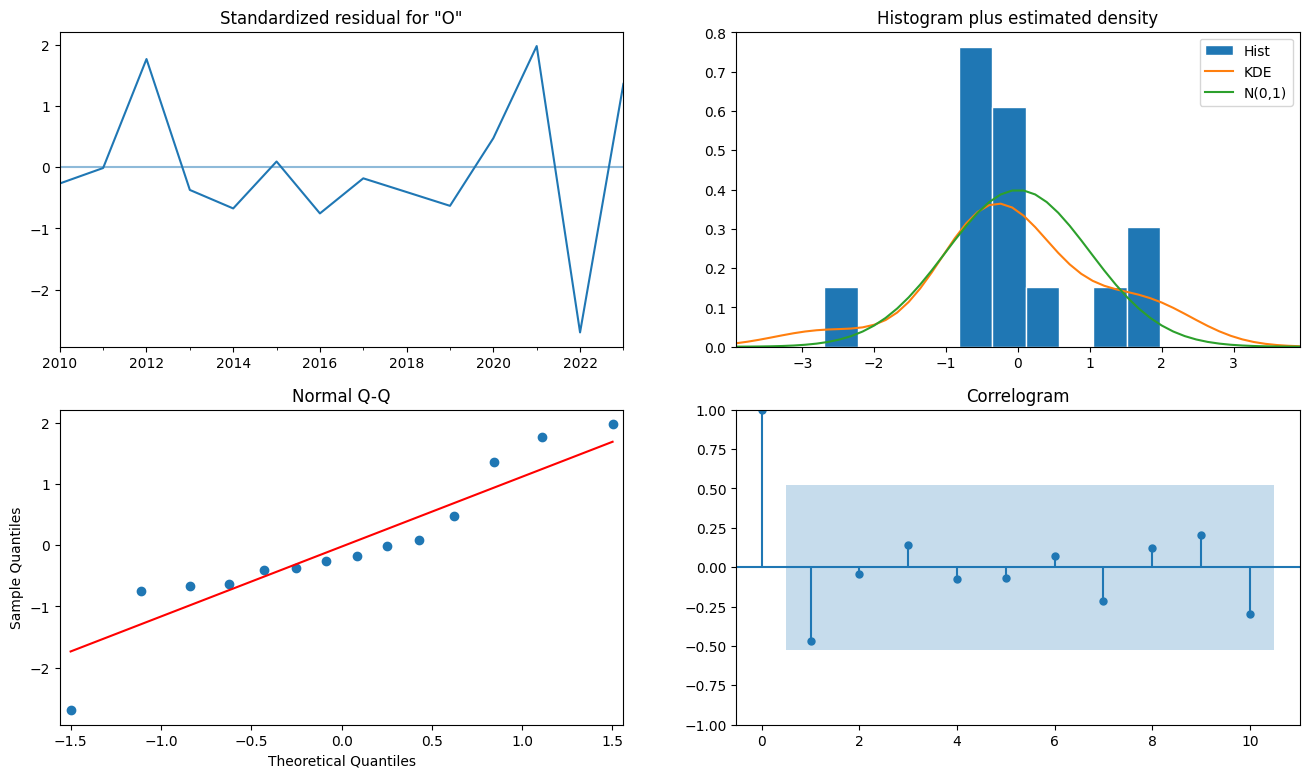

In [18]:
fig = plt.figure(figsize=(16,9))
fig = arima_0_2_1.plot_diagnostics(fig=fig)

The residual diagnostic demonstrates that the ARIMA model is well specified. Standardised reisudals fluctuate randomly around zero with no systematic pattern, suggesting that the model has efficiently captured the underlying structure of the series. 

With the assitance of the histogram & Q-Q plot, the residuals are shown to be normally distributed, with only minor deviations in the tails, which is assumed with such a small sample size. The residual autocorrelation functions demonstrates no significant remaining dependence. 

## Task 4: Arima Model Prediction

In [19]:
arima_offenders_forecast = arima_0_2_1.get_forecast(10)

arima_offenders_prediction = pd.DataFrame(arima_offenders_forecast.predicted_mean)

arima_offenders_prediction.index = arima_offenders_prediction.index.year.astype(str)

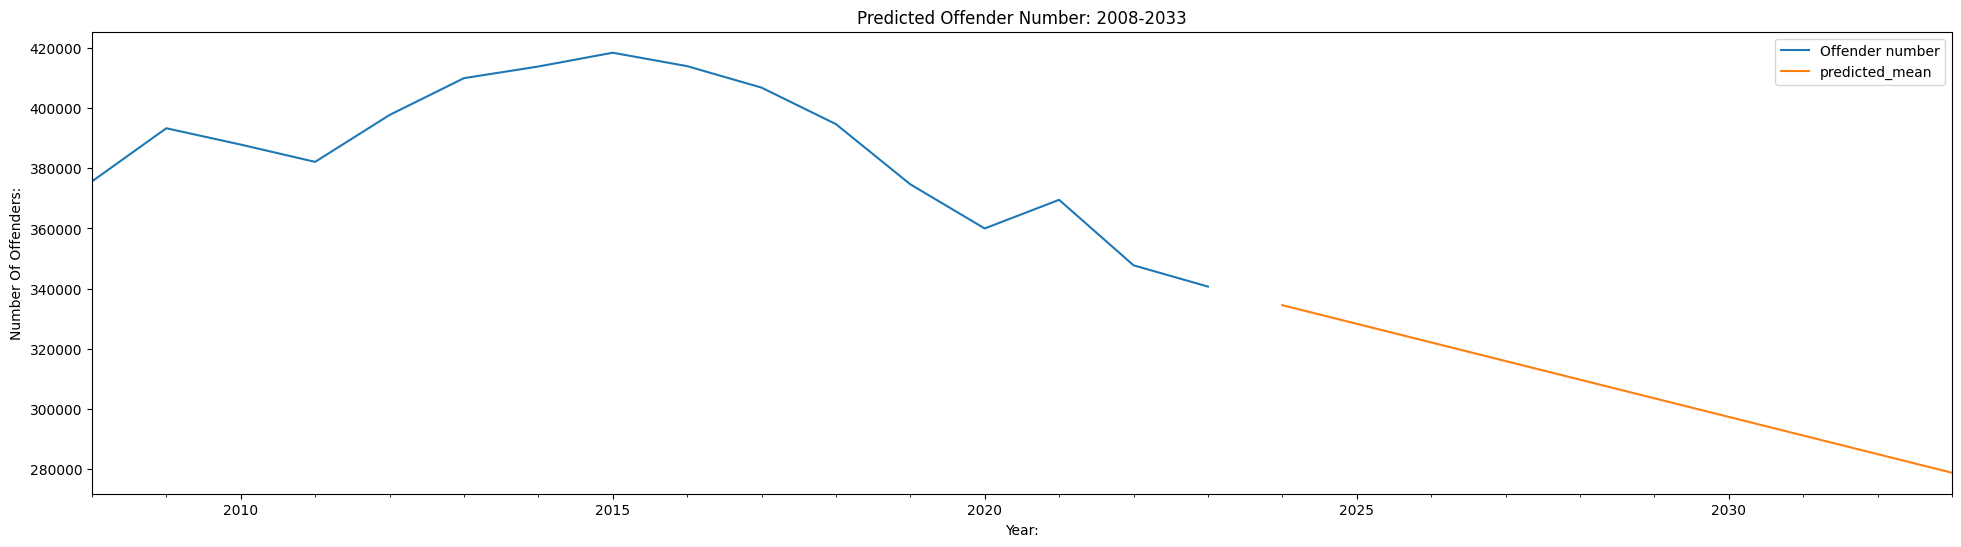

In [20]:
offenders_data.index = pd.to_datetime(offenders_data.index.astype(str), errors="raise")
arima_offenders_prediction.index = pd.to_datetime(arima_offenders_prediction.index.astype(str), errors="raise")

fig, ax = plt.subplots(figsize=(24,6))
offenders_data.plot(label="Offender number", ax=ax)
arima_offenders_prediction.plot(label="ARIMA(0,2,1) trend fcst", ax=ax)
plt.xlabel("Year:")
plt.ylabel("Number Of Offenders:")
plt.title("Predicted Offender Number: 2008-2033")
ax.legend()
plt.show()

Analysis of ARIMA model prediction: 

From our model, we can identify that the predicted offender number over the next 10 years will continue to decrease. Whilst this is not a direct, ML approach to predict a more seasonal + residual forecast, we can directly utilise this to predict a more general approach.

Now since this demonstrates that crime should decrease, this is not direct to burglary or break-in's. As a general overview, this suggests that overall offender count will decrease for the inevitable future, but this does not consider specific crime's nor does it consider the actual crime rate. As a further extension, we should investigate the specific burglary count to provide more insightful data. 

## Task 4: Arima Model Prediction (Intent to Harm Rate: )

In [21]:
arima_0_2_1_harmful = ARIMA(harmful_data, order=(0, 2, 1)).fit()
print(arima_0_2_1_harmful.summary())

                               SARIMAX Results                                
Dep. Variable:          Offender rate   No. Observations:                   16
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -54.003
Date:                Fri, 02 Jan 2026   AIC                            112.005
Time:                        14:59:58   BIC                            113.283
Sample:                    01-01-2008   HQIC                           111.887
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7478      0.228     -3.277      0.001      -1.195      -0.301
sigma2       123.7566     59.852      2.068      0.039       6.449     241.064
Ljung-Box (L1) (Q):                   0.58   Jarque-

/Users/galbraithlee/Desktop/Code/HomeSurveillance-Project/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/galbraithlee/Desktop/Code/HomeSurveillance-Project/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/galbraithlee/Desktop/Code/HomeSurveillance-Project/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


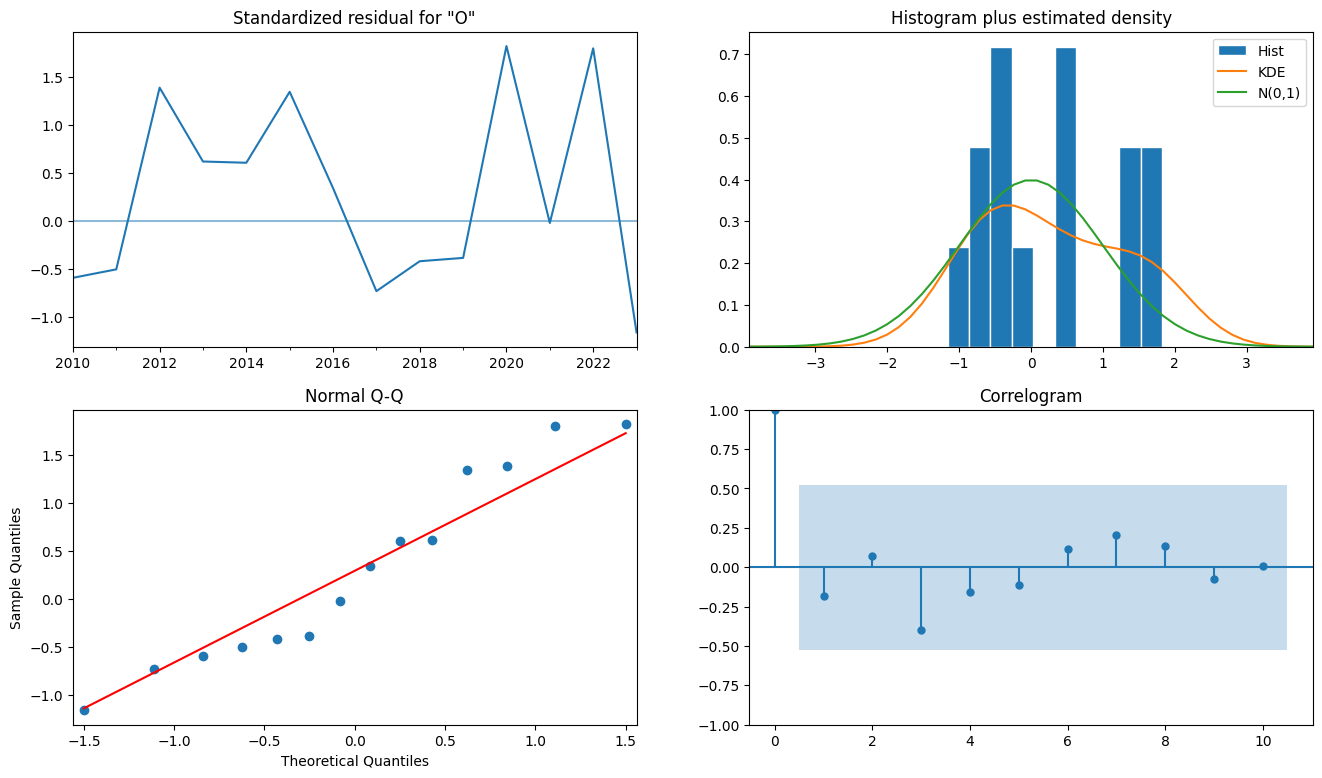

In [22]:
fig = plt.figure(figsize=(16,9))
fig = arima_0_2_1_harmful.plot_diagnostics(fig=fig)

The ARIMA(0,2,1) model suggests that the intent to harm rate is not stable year to year, but instead evolves gradually, reflecting a broader structural / social shifts rather than short-term fluctuations. Resultingly, we performed second differencing to remove persistent trends over time.

Our diagnostic tests indicate that the remaining variation in the model residuals is well-behaved, with no evidence of serial correlation, heteroskedasticity, or non-normality. Overall, the results imply that movements with the intent to harm rate are dominated by long-run structural changes, while short term spikes or drops tend to normalise over time. 

However, with such a small number of observations, these findings should be interpreted cautiously. 

In [23]:
arima_harmful_forecast = arima_0_2_1_harmful.get_forecast(10)

arima_harmful_prediction = pd.DataFrame(arima_harmful_forecast.predicted_mean)

arima_harmful_prediction.index = arima_harmful_prediction.index.year.astype(str)

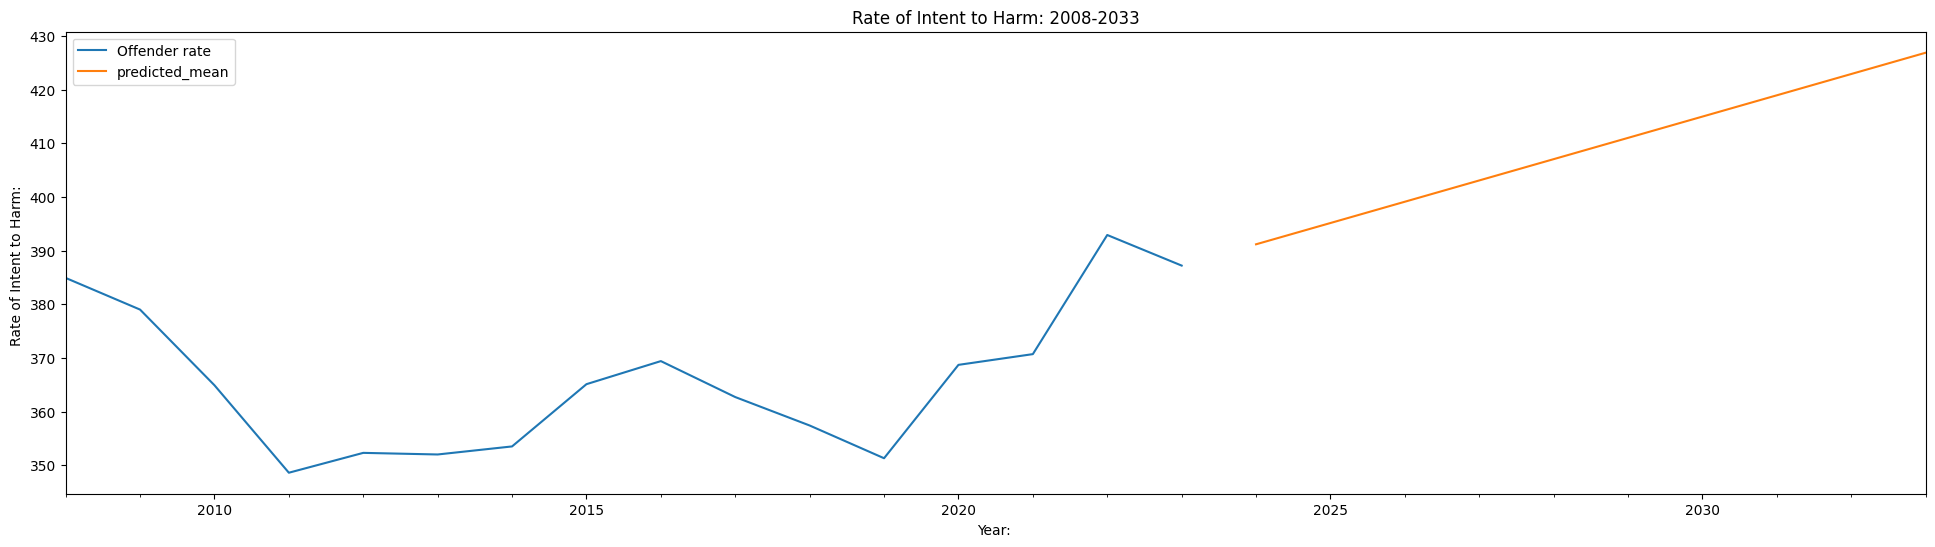

In [24]:
harmful_data.index = pd.to_datetime(harmful_data.index.astype(str), errors="raise")
arima_harmful_prediction.index = pd.to_datetime(arima_harmful_prediction.index.astype(str), errors="raise")

fig, ax = plt.subplots(figsize=(24,6))
harmful_data.plot(label="Intent to Harm Rate", ax=ax)
arima_harmful_prediction.plot(label="ARIMA(0,2,1)_harmful intent trend fcst", ax=ax)
plt.xlabel("Year: ")
plt.ylabel("Rate of Intent to Harm: ")
plt.title("Rate of Intent to Harm: 2008-2033")
ax.legend()
plt.show()

On the opposite side of the spectrum, we can ultimately see that the rate of intent to harm from 2023 is set to increase, to 426.87 people per 100,000 offenders by 2033, an overall increase by 11% from 2008-2033. Ultimately, whilst we see that the prediction for overall offender rate decrease, the actual intent to harm increases. 

<i>So what does this entail for us?</i>

In a general sense, this means that whilst the number of offenders is set to decrease, the actual hostility and intent to harm and kill others is forecasted to increase. Does this mean crime is decreasing though? In a larger picture, this proves that crime is set to become increasingly hostile and lead to more physical harm. 

---

## So how does this lead into our product?

Before we identify what we need to focus on, we need to find a real world problem that we want to target. The first crucial step is pinpointing a specific crime that we can tackle and potentially extend this product into other fields. 

As a resident on the Gold Coast in Australia, I have seen that recently the number of home break-ins have increased substancially over the course of my life living here. Whilst many news outlets will provide the CCTV footage of robbers intruding into the home, I have yet to identify a system which actually tracks the number of intruders, potential weapons and the lack of direct contact with the user to alert them. 

This allows robbers and thieves to continue this trend with no potential retalliation or drawbacks. So how can we face this? How could we actually prevent this or even attempt to reduce this?

I have concluded that our product must pass the following criteria's:

1. Provide real-world tracking of humans.
2. Provide end-user with number of intruders at time of report.
3. Have a communication system with the end-user to alert them of current intrusion. 
4. A CCTV software which has just enough features, without bloating the end product and overcomplicating it for the user. 

By achieveing these criteria's, we have an end-product which can be utilised to increase home security, and provide the required information to the end user. 